In [3]:
import cv2
import numpy as np
import tkinter as tk

# importing Libraries

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Flatten,Conv2D,Dropout
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG , Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)

Tensorflow version: 2.16.1


## Exploring Dataset

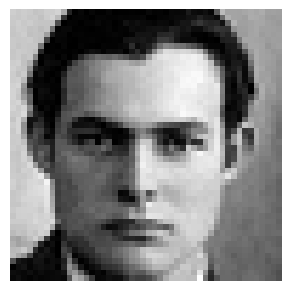

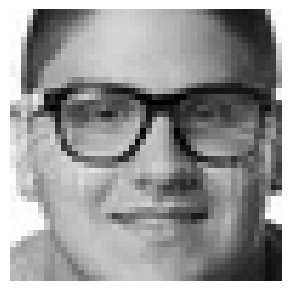

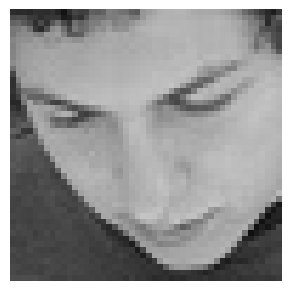

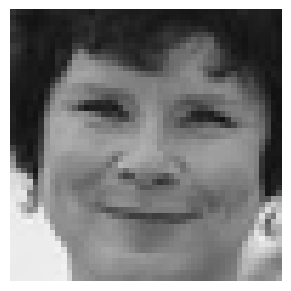

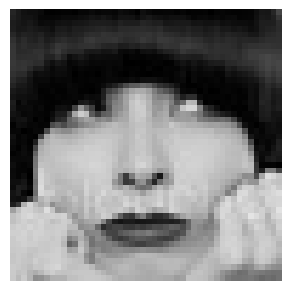

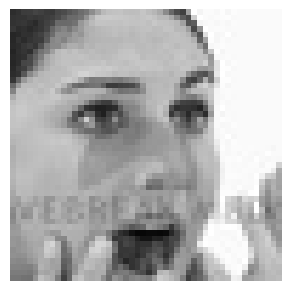

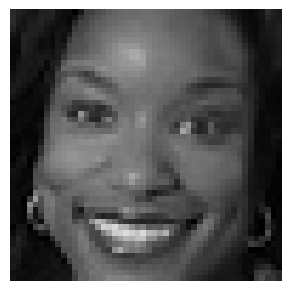

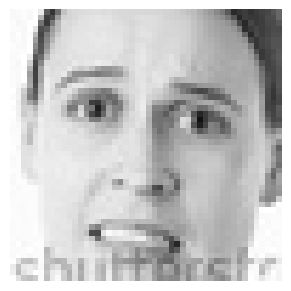

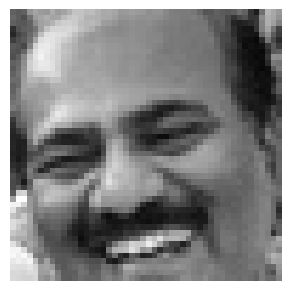

In [4]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

# Preparing Data For training

In [39]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)


validation_generator=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("test/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


**Defining Model**

In [40]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)#decrease dimensions of the data
    x=Dropout(0.25)(x)
    
    return x

In [41]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x
    

In [42]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))
    
    flatten=Flatten()(conv_3)
    
    dense_1=Dense_f(flatten,256)
    output=Dense(7,activation="softmax")(dense_1)
    model=Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'],optimizer='Adam',metrics=['accuracy'])
    return model

In [1]:
model=model_fer((48,48,1))
model.summary()

NameError: name 'model_fer' is not defined

# Initializing the model

In [44]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint("model.weights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]


# Training The Model

In [46]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15


KeyboardInterrupt: 

# Model Evaluation

In [37]:
model.evaluate(validation_generator)

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 7), output.shape=(None, 77)

# plotting Loss

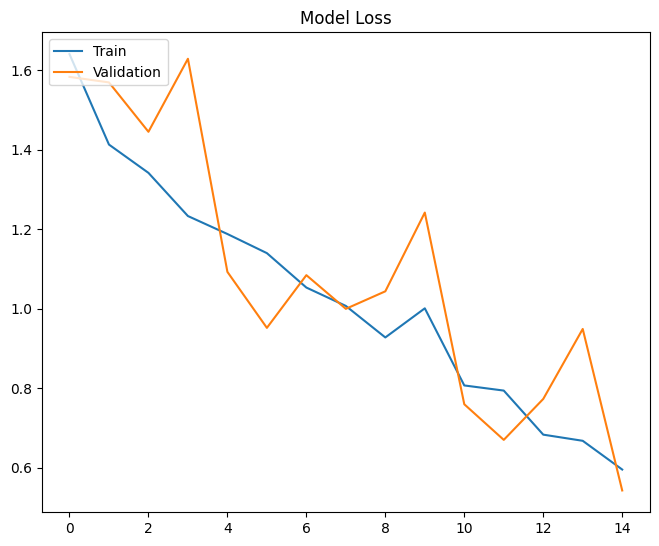

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

# plot accuracy

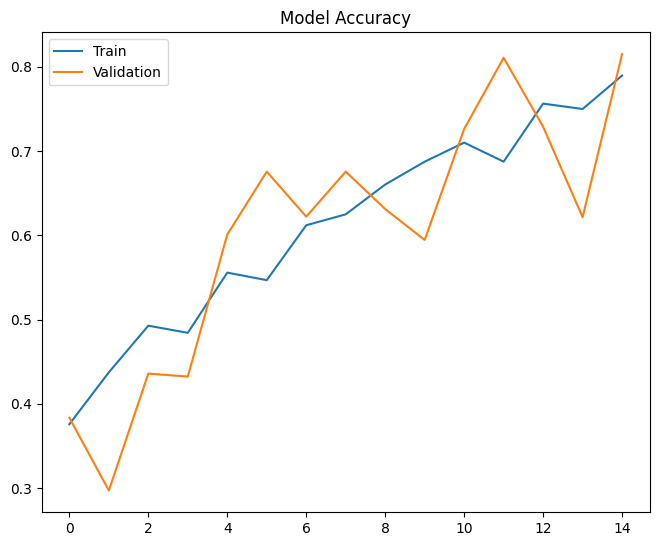

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

**Saving Model**

In [14]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)